In [1]:
import pandas as pd
import numpy as np
import klib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4.0,2.0,177.0,3.0,low,F,44.0,1233.0,1.0
1,2,F,Flight,4.0,5.0,216.0,2.0,low,M,59.0,3088.0,1.0
2,3,A,Flight,2.0,2.0,183.0,4.0,low,M,48.0,3374.0,1.0
3,4,B,Flight,3.0,3.0,176.0,4.0,medium,M,10.0,1177.0,1.0
4,5,C,Flight,2.0,2.0,184.0,3.0,medium,F,46.0,2484.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10995 non-null  object 
 3   Customer_care_calls  10995 non-null  float64
 4   Customer_rating      10997 non-null  float64
 5   Cost_of_the_Product  10996 non-null  float64
 6   Prior_purchases      10996 non-null  float64
 7   Product_importance   10996 non-null  object 
 8   Gender               10996 non-null  object 
 9   Discount_offered     10996 non-null  float64
 10  Weight_in_gms        10996 non-null  float64
 11  Reached.on.Time_Y.N  10995 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       4
Customer_care_calls    4
Customer_rating        2
Cost_of_the_Product    3
Prior_purchases        3
Product_importance     3
Gender                 3
Discount_offered       3
Weight_in_gms          3
Reached.on.Time_Y.N    4
dtype: int64

# data cleaning using klib

In [12]:
df = klib.data_cleaning(df)  
df = klib.convert_datatypes(df) 

Shape of cleaned data: (10999, 12) - Remaining NAs: 32


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.65 MB (-64.36%)



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10999 non-null  int16   
 1   warehouse_block      10999 non-null  category
 2   mode_of_shipment     10995 non-null  category
 3   customer_care_calls  10995 non-null  float32 
 4   customer_rating      10997 non-null  float32 
 5   cost_of_the_product  10996 non-null  float32 
 6   prior_purchases      10996 non-null  float32 
 7   product_importance   10996 non-null  category
 8   gender               10996 non-null  category
 9   discount_offered     10996 non-null  float32 
 10  weight_in_gms        10996 non-null  float32 
 11  reached_on_time_y_n  10995 non-null  float32 
dtypes: category(4), float32(7), int16(1)
memory usage: 365.9 KB


# filling out missing values 

In [17]:
missing_val = df.isnull().sum()>0

In [31]:
missing_values = df.isnull().sum() > 0
for col in df.columns[missing_values]:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   10999 non-null  int16   
 1   warehouse_block      10999 non-null  category
 2   mode_of_shipment     10999 non-null  category
 3   customer_care_calls  10999 non-null  float32 
 4   customer_rating      10999 non-null  float32 
 5   cost_of_the_product  10999 non-null  float32 
 6   prior_purchases      10999 non-null  float32 
 7   product_importance   10999 non-null  category
 8   gender               10999 non-null  category
 9   discount_offered     10999 non-null  float32 
 10  weight_in_gms        10999 non-null  float32 
 11  reached_on_time_y_n  10999 non-null  float32 
dtypes: category(4), float32(7), int16(1)
memory usage: 365.9 KB


# let's find numerical columns

numerical_cols = df.select_dtypes(include=["int16","float32"]).columns


In [83]:
numerical_cols

NameError: name 'numerical_cols' is not defined

# calculating skewness for numerical columns

In [43]:
skewness = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 discount_offered       1.800202
prior_purchases        1.682151
customer_care_calls    0.392779
customer_rating        0.004523
id                     0.000000
cost_of_the_product   -0.157599
weight_in_gms         -0.250159
reached_on_time_y_n   -0.393708
dtype: float64


# the standard formfula for skewness

In [ ]:
# If skewness > +0.5 → Right-skewed (log/square root transformation).
# If skewness < -0.5 → Left-skewed (sometimes power transformation).
# If skewness ≈ 0 → Kerak emas.

ValueError: num must be an integer with 1 <= num <= 6, not 7

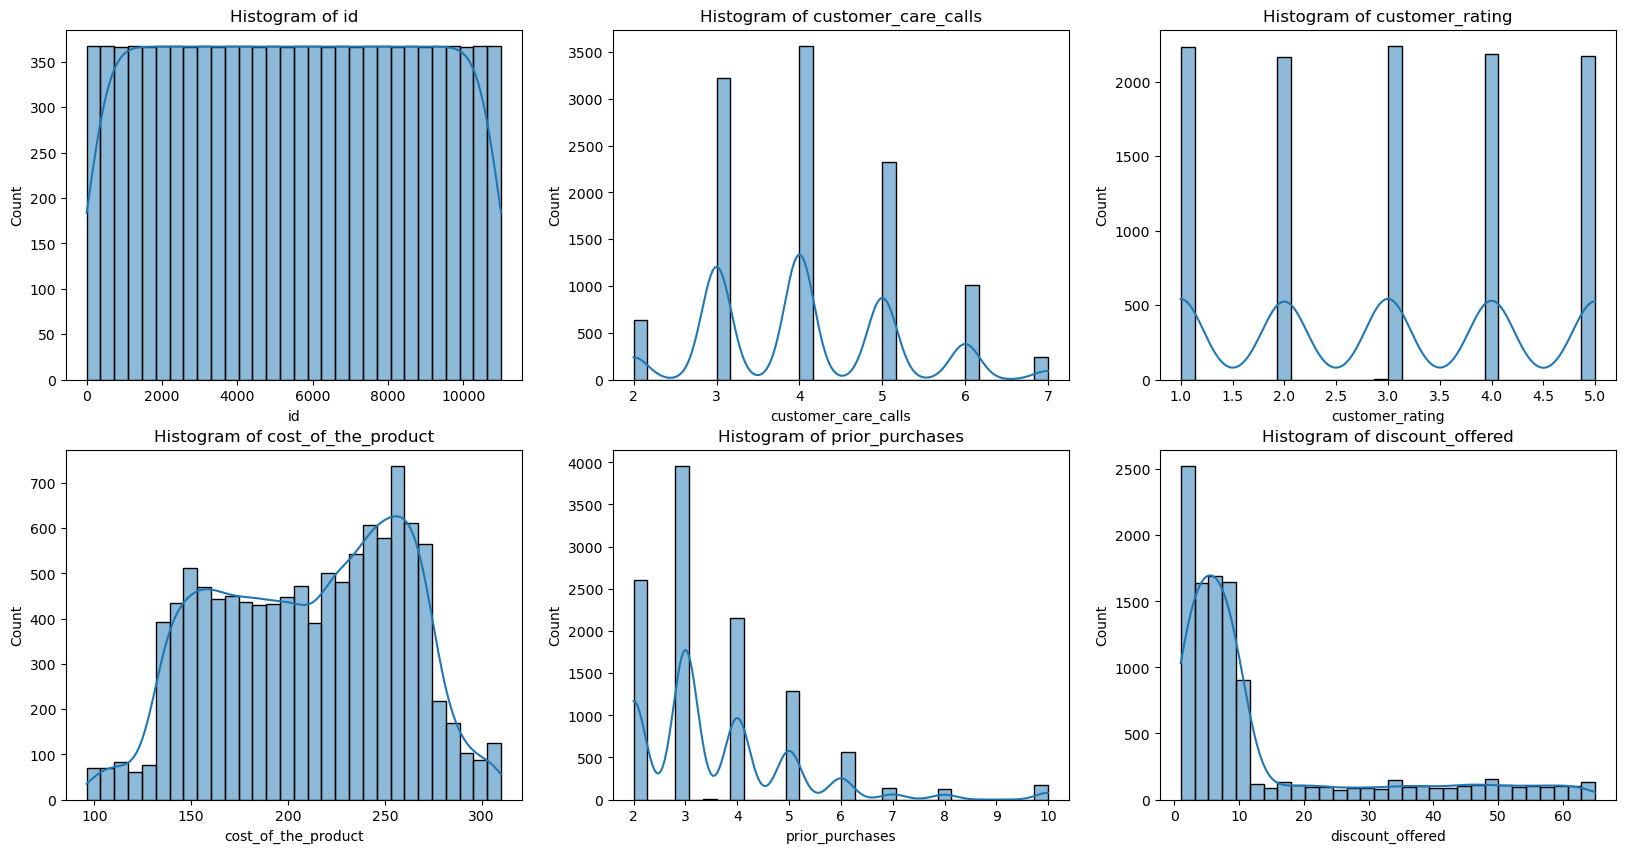

In [64]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()


# Identify features that need transformations (threshold: ±0.5)

In [66]:
skewed_features = skewness[abs(skewness) > 0.5].index.tolist()
print("Features that need transformation:", skewed_features)


Features that need transformation: ['discount_offered', 'prior_purchases']


# let's apply log transformation on these 2

In [74]:
df["log_discount_offered"] = np.log1p(df["discount_offered"])

In [76]:
df["log_prior_purchases"] = np.log1p(df["prior_purchases"])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    10999 non-null  int16   
 1   warehouse_block       10999 non-null  category
 2   mode_of_shipment      10999 non-null  category
 3   customer_care_calls   10999 non-null  float32 
 4   customer_rating       10999 non-null  float32 
 5   cost_of_the_product   10999 non-null  float32 
 6   prior_purchases       10999 non-null  float32 
 7   product_importance    10999 non-null  category
 8   gender                10999 non-null  category
 9   discount_offered      10999 non-null  float32 
 10  weight_in_gms         10999 non-null  float32 
 11  reached_on_time_y_n   10999 non-null  float32 
 12  log_discount_offered  10999 non-null  float32 
 13  log_prior_purchases   10999 non-null  float32 
dtypes: category(4), float32(9), int16(1)
memory usage: 451

In [80]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time_y_n,log_discount_offered,log_prior_purchases
0,1,D,Flight,4.0,2.0,177.0,3.0,low,F,44.0,1233.0,1.0,3.806663,1.386294
1,2,F,Flight,4.0,5.0,216.0,2.0,low,M,59.0,3088.0,1.0,4.094345,1.098612
2,3,A,Flight,2.0,2.0,183.0,4.0,low,M,48.0,3374.0,1.0,3.891820,1.609438
3,4,B,Flight,3.0,3.0,176.0,4.0,medium,M,10.0,1177.0,1.0,2.397895,1.609438
4,5,C,Flight,2.0,2.0,184.0,3.0,medium,F,46.0,2484.0,1.0,3.850147,1.386294


# Discretization

In [44]:
from sklearn.preprocessing import KBinsDiscretizer

In [46]:
continuous_features = ['cost_of_the_product', 'discount_offered', 'weight_in_gms']

# Equal Width Binning 

In [49]:
equal_width = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform")

# Equal Frequency Binning

In [52]:
equal_freq = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile") 

In [54]:
for feature in continuous_features:
    # Apply Equal Width Binning
    df[f"{feature}_equal_width"] = equal_width.fit_transform(df[[feature]])
    # Apply Equal Frequency Binning
    df[f"{feature}_equal_freq"] = equal_freq.fit_transform(df[[feature]])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   id                               10999 non-null  int16   
 1   warehouse_block                  10999 non-null  category
 2   mode_of_shipment                 10999 non-null  category
 3   customer_care_calls              10999 non-null  float32 
 4   customer_rating                  10999 non-null  float32 
 5   cost_of_the_product              10999 non-null  float32 
 6   prior_purchases                  10999 non-null  float32 
 7   product_importance               10999 non-null  category
 8   gender                           10999 non-null  category
 9   discount_offered                 10999 non-null  float32 
 10  weight_in_gms                    10999 non-null  float32 
 11  reached_on_time_y_n              10999 non-null  float32 
 12  cost

In [58]:
df['weight_in_gms'].value_counts()

weight_in_gms
4883.0    12
1005.0    10
5783.0    10
5672.0    10
4314.0    10
          ..
1425.0     1
3811.0     1
1609.0     1
2178.0     1
1098.0     1
Name: count, Length: 4035, dtype: int64

In [60]:
df['weight_in_gms_equal_width'].value_counts()

weight_in_gms_equal_width
2.0    3606
0.0    3576
3.0    2582
1.0    1229
4.0       6
Name: count, dtype: int64

In [62]:
df['weight_in_gms_equal_freq'].value_counts()

weight_in_gms_equal_freq
3.0    2203
1.0    2202
4.0    2200
0.0    2198
2.0    2196
Name: count, dtype: int64